In [1]:
#@title 
# General Use
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

 

# Training
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, auc, precision_recall_curve


#DL imports
 
 
from keras.models import Sequential

import tensorflow as tf
 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy

!pip install optuna
import optuna

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 84.8 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 146 kB 64.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 112 kB 65.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=5e91da25e36690d29e1291fdd369e741e7a37d6f55b452f1236636f35cbbf172
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
# read and display shape of data
# path = 'cnv_methyl_mrna_clinical.csv'
path = 'vanilla_encoded_cnv_methyl_mrna_biomed_clinical_85_features.csv'

df= pd.read_csv(path)
 
df.shape
df.head(10)

(450, 213)

,Unnamed: 0,concentration,normal_tumor_genotype_match,pcr_amplification_successful,intermediate_dimension,is_ffpe,longest_dimension,sample_type_id,shortest_dimension,percent_necrosis,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei,section_location,pharmaceutical_therapy_type,pharmaceutical_tx_started_days_to_x,pharmaceutical_tx_ongoing_indicator,pharmaceutical_tx_ended_days_to,pharma_adjuvant_cycles_count,radiation_treatment_adjuvant_x,pharmaceutical_tx_adjuvant_x,treatment_outcome_first_course_x,vital_status_x,last_contact_days_to_x,birth_days_to,ethnicity,history_neoadjuvant_treatment_y,vital_status_y,last_contact_days_to_y,tumor_grade,age_at_initial_pathologic_diagnosis,days_to_initial_pathologic_diagnosis,DNA,GenomePlex (Rubicon) Amplified DNA,RNA,Repli-G (Qiagen) DNA,Total RNA,PicoGreen,UV Spec,Blood Derived Normal,Primary Tumor,Recurrent Tumor,Solid Tissue Normal,IP,IP|IV,IV,Other (specify below),PO,ADJUVANT,"OTHER, SPECIFY IN NOTES",PALLIATIVE,PROGRESSION,AMERICAN INDIAN OR ALASKA NATIVE,ASIAN,BLACK OR AFRICAN AMERICAN,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,WHITE,Cytology (e.g. Peritoneal or pleural fluid),Excisional Biopsy,Fine needle aspiration biopsy,Incisional Biopsy,"Other method, specify:",Tumor resection,Bilateral,Left,Right,Omentum,Ovary,Peritoneum ovary,1-10 mm,11-20 mm,>20 mm,No Macroscopic disease,Stage IA,Stage IB,Stage IC,Stage IIA,Stage IIB,Stage IIC,Stage IIIA,Stage IIIB,Stage IIIC,Stage IV,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,RECURRENCE
0,TCGA-10-0926-01,0.15,1,1.000000,0.8,0,1.0,1.0,0.6,0,2.0,0.0,98.0,99,0,1.0,290.0,0.000000,729.0,13.000000,1.0,1.0,1,0,788.0,-23307.0,0.001801,0,0,788.0,3.0,63,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.000000,0.073649,1.000000,3.896559e-01,0.000340,3.561266e-09,0.102453,1.000000,0.999965,1.0,0.998283,0.991972,1.0,0.944839,1.0,0.297801,...,0.999998,0.610483,1.0,0.906578,0.986108,1.0,1.000000,1.0,0.999999,0.027495,0.478273,0.999999,0.999416,1.000000,0.974016,1.000000,1.000000,3.463679e-10,0.999994,0.002799,0.999997,0.999991,1.000000,1.000000,1.000000,0.998486,7.690646e-15,1.000000,0.963218,4.069718e-08,0.027125,1.092884e-10,0.688925,2.146192e-11,1.000000,0.881116,0.116067,0.013808,1.0,9.363929e-03,1.0,0.515923,4.278337e-10,0.993899,0.999991,1.0,0.998692,0.999996,0.987675,0.930790,0.999993,0.691585,1.000000,5.672499e-08,0.856181,1.000000,0.033011,3.491291e-10,1.000000,0.000071,3.874622e-08,5.614363e-08,2.961257e-06,9.580406e-11,0.999998,5.942318e-07,0.999880,1.000000,0.995176,7.301903e-10,0.998277,0.981147,1.0,0.999996,0.943405,3.390123e-07,0.000014,1.762634e-10,1.510083e-08,0.999980,5.052402e-11,0.997085,0.999998,7.232052e-07,0.043652,1.0,1.0,1.469782e-06,0.860844,8.224647e-08,0.598811,0.999999,1.0,0.999999,0.984497,1.000000,1.000000,9.303836e-11,0.999999,1
1,TCGA-10-0927-01,0.14,1,1.000000,0.7,0,1.1,1.0,0.6,0,5.0,5.0,90.0,95,1,1.0,1601.0,-0.057624,1686.0,10.000000,0.0,1.0,1,0,2478.0,-23982.0,1.000000,0,0,2478.0,2.0,65,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.999999,0.030719,1.000000,1.118270e-01,0.000316,9.160425e-09,0.319987,1.000000,0.999997,1.0,0.998433,0.993931,1.0,0.900598,1.0,0.864601,...,0.999999,0.791365,1.0,0.503002,0.984892,1.0,1.000000,1.0,1.000000,0.070237,0.653069,0.999999,0.999686,0.999995,0.589774,1.000000,1.000000,3.664771e-10,0.999995,0.006132,0.999999,0.999995,1.000000,1.000000,1.000000,0.997478,1.035691e-14,0.999999,0.991500,3.050846e-08,0.016541,6.893233e-11,0.817267,1.201688e-11,1.000000,0.892347,0.153515,0.045990,1.0,9.515822e-03,1.0,0.466771,1.946249e-10,0.98663

In [ ]:
df.RECURRENCE

0      1
1      0
2      0
3      1
4      0
      ..
445    0
446    0
447    0
448    0
449    0
Name: RECURRENCE, Length: 450, dtype: int64

In [ ]:
df.RECURRENCE.value_counts()

0    391
1     59
Name: RECURRENCE, dtype: int64

In [3]:
#train test split to be used BOTH for ML baseline and DL models
y = df['RECURRENCE']
X = df.drop(columns=["treatment_outcome_first_course_x", 'RECURRENCE', "Unnamed: 0", 'ADJUVANT', 	"pharmaceutical_tx_started_days_to_x",	"pharmaceutical_tx_ongoing_indicator",	"pharmaceutical_tx_ended_days_to"], inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
#machine learning baseline  XGB recurrence NO adjuvant to test, xgb has .65 auc roc and 87% accuracy


===== start XGB =====


XGBClassifier()

===== start RandomForest =====


RandomForestClassifier()

===== start LogisticRegression =====


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

===== start plotting results =====


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

Text(0.5, 0.98, 'ROC Curve Comparison for Ground Truth Data')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


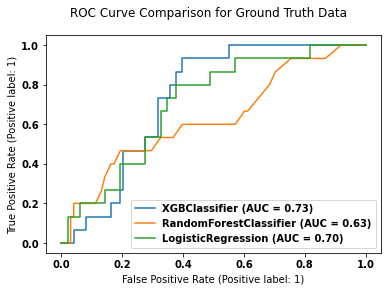

In [ ]:
#machine learning for recurrence  XGB recurrence, this is to establish an ML baseline to compare the DL models against

print("===== start XGB =====")
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("===== start RandomForest =====")
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("===== start LogisticRegression =====")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


print("===== start plotting results =====")

font = {"family": "normal", "weight": "bold", "size": 10}

import matplotlib
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
matplotlib.rc("font", **font)

xgb_disp = plot_roc_curve(xgb, X_test, y_test)
forest_disp = plot_roc_curve(forest, X_test, y_test, ax=xgb_disp.ax_)
logreg_disp = plot_roc_curve(logreg, X_test, y_test, ax=xgb_disp.ax_)
logreg_disp.figure_.suptitle("ROC Curve Comparison for Ground Truth Data")

In [ ]:
X_test.shape

(113, 206)

In [4]:
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(206, input_dim=206, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# Function to create model, required for KerasClassifier

#This is attempt with 2 layers, very basic baseline
def create_model(optimizer='adam', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(1, input_dim=206, kernel_initializer=init, activation='relu'))

	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# y = df['treatment_outcome_first_course_x']
# X = df.drop(columns=["treatment_outcome_first_course_x", "Unnamed: 0"], inplace=False)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 50]
batches = [32, 64, 128]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y) 



In [ ]:
# summarize results for 2 layers
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# best AUC ROC for 2 layers 
 
y_pred_proba = grid_result.best_estimator_.predict_proba(X_test)[::,1]

print(roc_auc_score(y_test, y_pred_proba))

In [ ]:
 

#This is attempt with 3 layers
def create_model(optimizer='adam', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=206, kernel_initializer=init, activation='relu'))
	# model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# y = df['treatment_outcome_first_course_x']
# X = df.drop(columns=["treatment_outcome_first_course_x", "Unnamed: 0"], inplace=False)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 50]
batches = [32, 64, 128]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# summarize results for 3 layers 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871111 using {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 'adam'}
0.682222 (0.282982) with: {'batch_size': 32, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.768889 (0.205529) with: {'batch_size': 32, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.691111 (0.315712) with: {'batch_size': 32, 'epochs': 20, 'init': 'normal', 'optimizer': 'rmsprop'}
0.844444 (0.078567) with: {'batch_size': 32, 'epochs': 20, 'init': 'normal', 'optimizer': 'adam'}
0.868889 (0.062222) with: {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.871111 (0.045866) with: {'batch_size': 32, 'epochs': 20, 'init': 'uniform', 'optimizer': 'adam'}
0.862222 (0.066146) with: {'batch_size': 32, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.693333 (0.214488) with: {'batch_size': 32, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.848889 (0.053794) with: {'batch_size': 32, 'epochs': 50, 'init': 'normal',

In [ ]:
# best AUC ROC for 3 layers 
 
y_pred_proba = grid_result.best_estimator_.predict_proba(X_test)[::,1]

print(roc_auc_score(y_test, y_pred_proba))

0.6333333333333334


In [ ]:
# NOW TRYING with 4 layers
def create_model(optimizer='adam', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=206, kernel_initializer=init, activation='relu'))
	model.add(Dense(16, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# y = df['treatment_outcome_first_course_x']
# X = df.drop(columns=["treatment_outcome_first_course_x", "Unnamed: 0"], inplace=False)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 50]
batches = [8, 32, 64, 128]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
# summarize results for 4 layers
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873333 using {'batch_size': 32, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.835556 (0.088722) with: {'batch_size': 8, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.715556 (0.164595) with: {'batch_size': 8, 'epochs': 20, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.868889 (0.062222) with: {'batch_size': 8, 'epochs': 20, 'init': 'normal', 'optimizer': 'rmsprop'}
0.866667 (0.065922) with: {'batch_size': 8, 'epochs': 20, 'init': 'normal', 'optimizer': 'adam'}
0.868889 (0.062222) with: {'batch_size': 8, 'epochs': 20, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.868889 (0.062222) with: {'batch_size': 8, 'epochs': 20, 'init': 'uniform', 'optimizer': 'adam'}
0.748889 (0.217574) with: {'batch_size': 8, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.751111 (0.227775) with: {'batch_size': 8, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.868889 (0.062222) with: {'batch_size': 8, 'epochs': 50, 'init': 'normal', 'optimize

In [ ]:
#best auc roc for 4 layers
y_pred_proba = grid_result.best_estimator_.predict_proba(X_test)[::,1]

print(roc_auc_score(y_test, y_pred_proba))

0.6931972789115647
